In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
database = "hawaii.sqlite"
engine = create_engine(f"sqlite:///{database}")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

Query Date: 2016-08-22


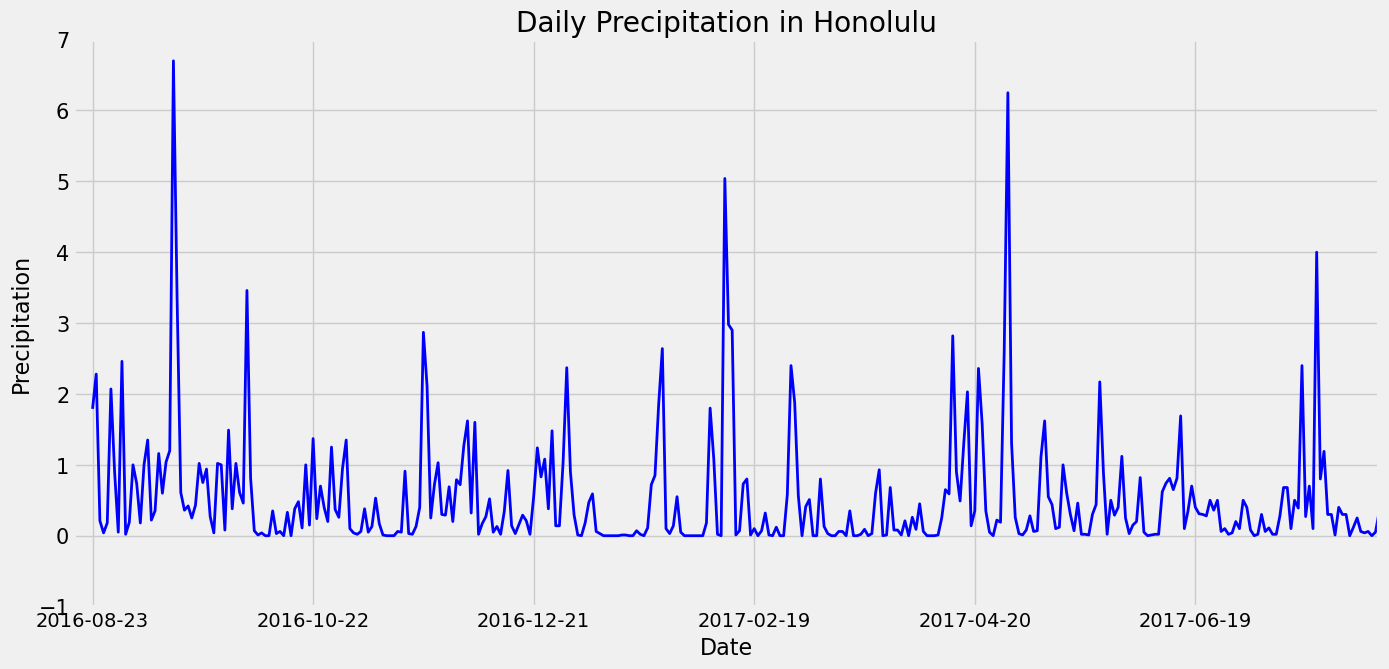

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date
# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago)
# Perform a query to retrieve the data and precipitation scores
year_precipitation =(session.query(Measurement.date,func.max(Measurement.prcp))
                     .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago).group_by(Measurement.date).all())
year_precipitation
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(year_precipitation, columns=['date', 'prcp'])
precipitation_df.set_index('date',inplace=True)
precipitation_df.head(10)
# Sort the dataframe by date
precipitation_df.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,7)
precipitation_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='blue')

plt.xlim(-5,350)
plt.ylim(-1,7)
plt.yticks(size=15)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black')
plt.ylabel('Precipitation',fontsize=16,color='black')
plt.title('Daily Precipitation in Honolulu')

plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_precipitation_stats=(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all())
year_precipitation_stats_df=pd.DataFrame(year_precipitation_stats, columns=['date', 'prcp'])
year_precipitation_stats_df.dropna()
year_precipitation_stats_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station).count()
print(f'{total_stations}')

9


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_station=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
print(most_active_station)
most_active_station_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 'max_temp', 'avg_temp'])
most_active_station_temp.set_index('station', inplace=True)
most_active_station_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago)
                  .filter(Measurement.station=='USC00519281')
                  .all())
print(year_tobs)

[('2016-08-23', 77.0), ('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10

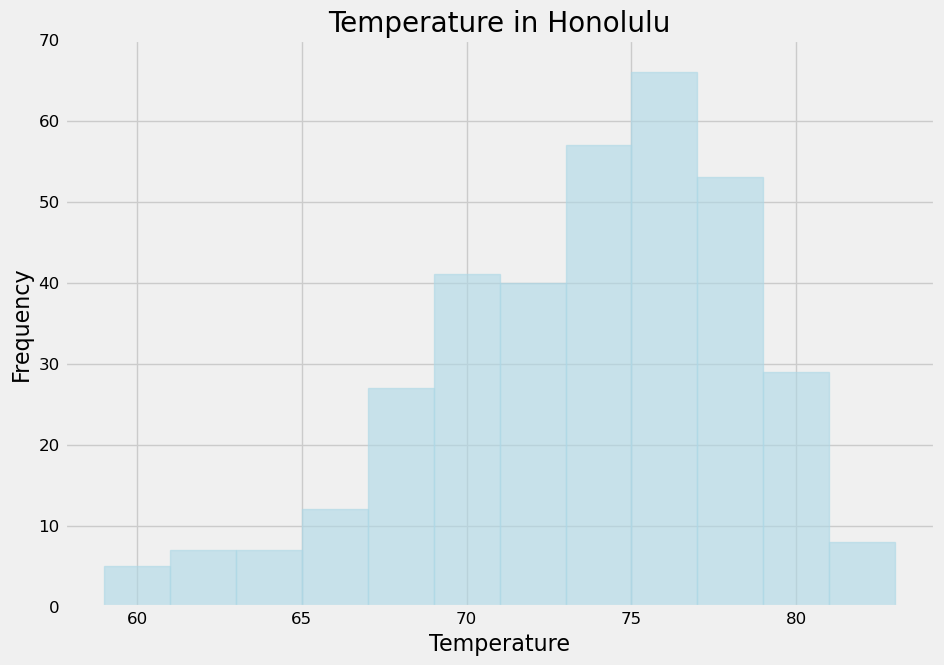

In [41]:
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)
plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='lightblue',
         linewidth=1,color='lightblue')

plt.title('Temperature in Honolulu',fontsize=20)
plt.xlabel('Temperature',fontsize=16,color='black')
plt.ylabel('Frequency',fontsize=16,color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)
plt.show()

# Close session

In [43]:
# Close Session
session.close()